## Data Exploration

In [285]:
# Import the prerequite libraries
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm, skew 

In [286]:
from sklearn.model_selection import cross_val_score
import numpy as np
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 7))
    return(rmse)

In [287]:
# Train test split
train = pd.read_csv('/Users/mofuoku/Documents/House Prices Advanced Regression Techniques/all/train.csv')
test = pd.read_csv('/Users/mofuoku/Documents/House Prices Advanced Regression Techniques/all/test.csv')

In [288]:
#display the first five rows of the train dataset.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [289]:
#display the first five rows of the test dataset.
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [290]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


## Data Cleaning

In [291]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Remove the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


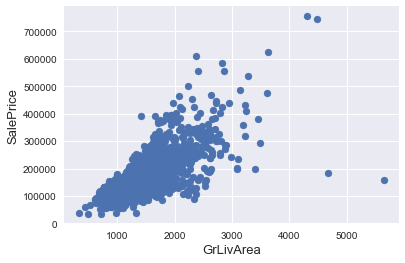

In [292]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

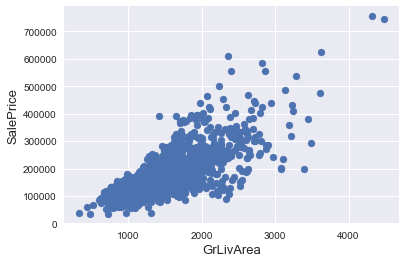

In [293]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Checking the plot again after deleting the outliers
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180932.92 and sigma = 79467.79



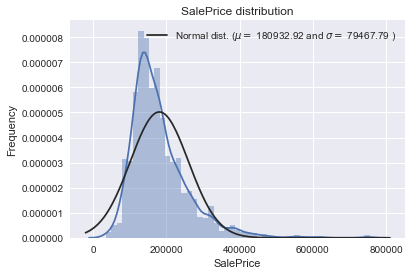

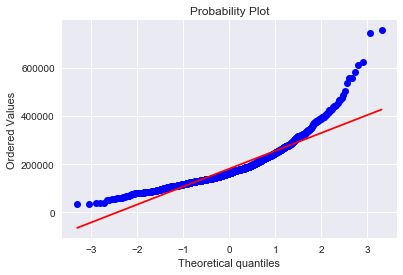

In [294]:
# SalePrice is the variable we need to predict. So let's do some analysis on this variable first.
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12.02 and sigma = 0.40



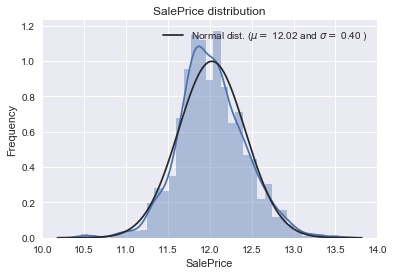

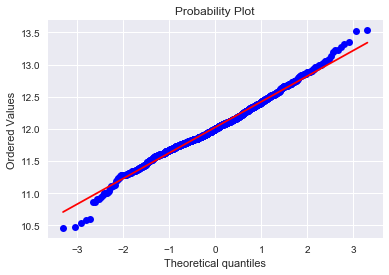

In [295]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [296]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
whole_data = pd.concat((train, test)).reset_index(drop=True)
whole_data.drop(['SalePrice'], axis=1, inplace=True)
print("whole_data size is : {}".format(whole_data.shape))

whole_data size is : (2917, 79)


In [297]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
whole_data = pd.concat((train, test)).reset_index(drop=True)
whole_data.drop(['SalePrice'], axis=1, inplace=True)
print("whole_data size is : {}".format(whole_data.shape))

whole_data size is : (2917, 79)


In [298]:
whole_data_na = (whole_data.isnull().sum() / len(whole_data)) * 100
whole_data_na = whole_data_na.drop(whole_data_na[whole_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :whole_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


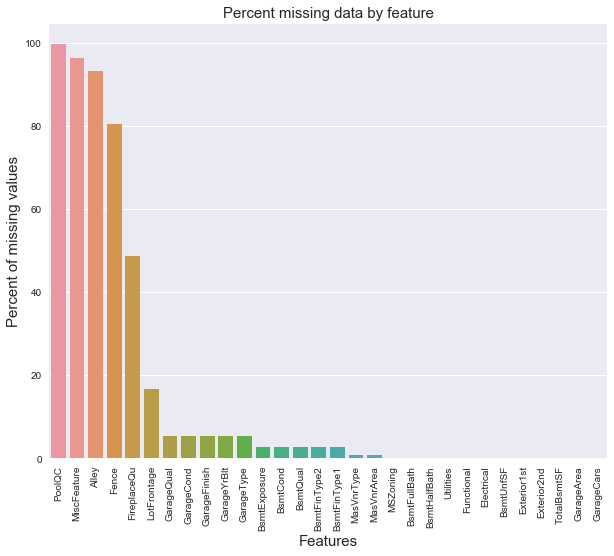

In [299]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=whole_data_na.index, y=whole_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

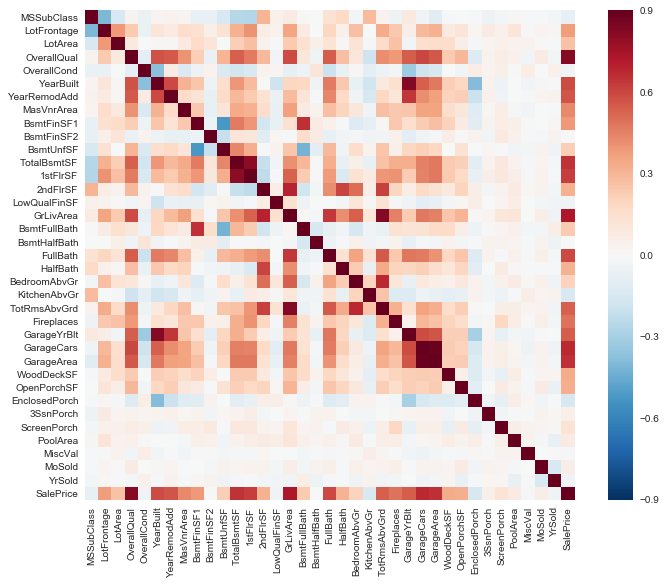

In [300]:
# Correlation map to see how features are correlated with SalePrice 
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [301]:
# data description states that NA indicates "No Pool"
whole_data["PoolQC"] = whole_data["PoolQC"].fillna("None")

In [302]:
# data description states that NA indicates "no misc feature"
whole_data["MiscFeature"] = whole_data["MiscFeature"].fillna("None")

In [303]:
# data description states that NA indicates "no alley access"
whole_data["Alley"] = whole_data["Alley"].fillna("None")

In [304]:
# data description states that NA indicates "no fence"
whole_data["Fence"] = whole_data["Fence"].fillna("None")

In [305]:
# data description states that NA indicates "no fireplace"
whole_data["FireplaceQu"] = whole_data["FireplaceQu"].fillna("None")

In [306]:
# Combine all the neighborhood and use the median LotFrontage to fill in missing value.
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):


    whole_data["LotFrontage"] = whole_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [307]:
# Substitute missing values with 'None' for GarageType, GarageFinish, GarageQual, and GarageCond.

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    whole_data[col] = whole_data[col].fillna('None')

In [308]:
# For GarageYrBlt, GarageArea, and GarageCars, substitute missing data with 0

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    whole_data[col] = whole_data[col].fillna(0)

In [309]:
# For BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath, substitute missing data with 0 

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    whole_data[col] = whole_data[col].fillna(0)

In [310]:
# NaN indicates that there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    whole_data[col] = whole_data[col].fillna('None')

In [311]:
# NA indicates that there is no masonry veneer
whole_data["MasVnrType"] = whole_data["MasVnrType"].fillna("None")

In [312]:
# NA indicates that there is no masonry veneer
whole_data["MasVnrArea"] = whole_data["MasVnrArea"].fillna(0)

In [313]:
# For the MSZoning feature,'RL' is the most common value. Therefore we can substitute the missing values with 'RL'
whole_data['MSZoning'] = whole_data['MSZoning'].fillna(whole_data['MSZoning'].mode()[0])

In [314]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is
# in the training set, this feature won't help in predictive modelling. We can then safely remove it
whole_data = whole_data.drop(['Utilities'], axis=1)

In [315]:
# Functional : data description says NA means typical
whole_data["Functional"] = whole_data["Functional"].fillna("Typ")

In [316]:
# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
whole_data['Electrical'] = whole_data['Electrical'].fillna(whole_data['Electrical'].mode()[0])

In [317]:
# Electrical has only one NA, then we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
whole_data['KitchenQual'] = whole_data['KitchenQual'].fillna(whole_data['KitchenQual'].mode()[0])

In [318]:
# Exterior 1 & 2 only have one missing value which we can replace with the usual basic string
whole_data['Exterior1st'] = whole_data['Exterior1st'].fillna(whole_data['Exterior1st'].mode()[0])  
whole_data['Exterior2nd'] = whole_data['Exterior2nd'].fillna(whole_data['Exterior2nd'].mode()[0]) 

In [319]:
# Fil with most frequent which is "WD"
whole_data['SaleType'] = whole_data['SaleType'].fillna(whole_data['SaleType'].mode()[0]) 

In [320]:
#Finally, ‘MSSubClass’ NA indicates No building class, consequently, we can substitute it with “None”
whole_data['MSSubClass'] = whole_data['MSSubClass'].fillna("None")

In [321]:
# Check remaining missing values if any
whole_data_na = (whole_data.isnull().sum() / len(whole_data)) * 100
whole_data_na = whole_data_na.drop(whole_data_na[whole_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :whole_data_na})
missing_data.head()

,Missing Ratio


## Feature Engineering

In [322]:
# Transforming some numerical variables that are categorical
whole_data['MSSubClass'] = whole_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
whole_data['OverallCond'] = whole_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
whole_data['YrSold'] = whole_data['YrSold'].astype(str)
whole_data['MoSold'] = whole_data['MoSold'].astype(str)

In [323]:
# Remove FireplaceQu, Alley, PoolQC, and Fence
to_delete = ['FireplaceQu', 'Alley', 'PoolQC', 'Fence']
whole_data = whole_data.drop(to_delete, axis = 1)

In [324]:
# Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(whole_data[c].values)) 
    whole_data[c] = lbl.transform(list(whole_data[c].values))

# shape        
print('Shape whole_data: {}'.format(whole_data.shape))

Shape whole_data: (2917, 74)


### Adding more important features

In [325]:
# Adding total sqfootage feature  
whole_data['TotalSF'] = whole_data['TotalBsmtSF'] + whole_data['1stFlrSF'] + whole_data['2ndFlrSF']

In [326]:
# Adding total bath 
whole_data["TotBath"] = whole_data["FullBath"] + 0.5*whole_data["HalfBath"] + whole_data["BsmtFullBath"] + 0.5*whole_data["BsmtHalfBath"]

In [327]:
# Adding overall grade
whole_data["OverallGrade"] = whole_data["OverallQual"] * whole_data["OverallCond"]

In [328]:
numeric_feats = whole_data.dtypes[whole_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = whole_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [329]:
# checking for highly skewed features and Box Cox transforming them using scipy function boxcox1p
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    whole_data[feat] = boxcox1p(whole_data[feat], lam)

There are 57 skewed numerical features to Box Cox transform


In [330]:
# Create dummy variables for the categorical features using one hot encoding
whole_data = pd.get_dummies(whole_data)
print(whole_data.shape)

(2917, 218)


In [331]:
train = whole_data[:ntrain]
test = whole_data[ntrain:]

## Modeling

In [332]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [333]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [334]:
# Lasso
print('Processing lasso...')
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Processing lasso...

Lasso score: 0.1108 (0.0074)



In [335]:
# Elastic net
print('Processing ENet...')
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Processing ENet...
ElasticNet score: 0.1108 (0.0074)



In [336]:
# Kernel Ridge
print('Processing Kernel ridge...')
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Processing Kernel ridge...
Kernel Ridge score: 0.1148 (0.0075)



In [337]:
# Gradient Boosting
print('Processing Gradient Boosting...')
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Processing Gradient Boosting...
Gradient Boosting score: 0.1156 (0.0094)



In [338]:
print('Processing Gradient Boosting...')
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1)

Processing Gradient Boosting...


In [339]:
print('Processing lgb...')
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Processing lgb...


In [340]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [341]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.1079 (0.0079)



In [342]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [343]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1074 (0.0075)


In [344]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Processing for the best multiple model stacking:

In [345]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07615759746251351


In [346]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.04232376674076269


In [347]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07135825747657598


In [348]:
'''RMSE for the whole training when averaging''' 

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.10 + lgb_train_pred*0.20 ))

RMSLE score on train data:
0.06992077792989992


In [349]:
ensemble = stacked_pred*0.70 + xgb_pred*0.10 + lgb_pred*0.20

In [350]:
# Create CSV submission file to Kaggle:
final_submission = pd.DataFrame()
final_submission['Id'] = test_ID
final_submission['SalePrice'] = ensemble

final_submission.to_csv('submission.csv', index=False)